# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [34]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [35]:
train, test = keras.datasets.cifar10.load_data()

In [36]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [37]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [38]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64 , 64, 32]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080

In [39]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-3 ,1e-5 ]
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.95

SGD = keras.optimizers.SGD( momentum=MOMENTUM)
RMSprop = keras.optimizers.RMSprop()
Adagrad = keras.optimizers.Adagrad()
Adam = keras.optimizers.Adam()

optimizers = {"SGD":SGD,"RMSprop":RMSprop,"Adagrad":Adagrad,"Adam":Adam}

In [40]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for key, opt in optimizers.items():
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f and  opt = %s" %(lr,key))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        opt.LEARNING_RATE = lr
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

        model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                batch_size=BATCH_SIZE, 
                validation_data=(x_test, y_test), 
                shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "opt = %s >>> exp-lr-%s" %(str(lr),key)
        results[exp_name_tag] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}

Experiment with LR = 0.001000 and  opt = SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer6 

50000/50000 [==============================] - 9s 177us/step - loss: 0.8039 - accuracy: 0.7103 - val_loss: 1.5256 - val_accuracy: 0.5243curacy: 0.71 - ETA: 3s - loss: - ETA: 0s - loss: 0.8007 - accu - ETA: 0s - loss: 0.8045 - accuracy: 0. - ETA: 0s - loss: 0.8039 - accuracy: 0.
Epoch 44/100
50000/50000 [==============================] - 8s 166us/step - loss: 0.8134 - accuracy: 0.7076 - val_loss: 1.5181 - val_accuracy: 0.5167
Epoch 45/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.7905 - accuracy: 0.7168 - val_loss: 1.5968 - val_accuracy: 0.5196
Epoch 46/100
50000/50000 [==============================] - 9s 170us/step - loss: 0.8081 - accuracy: 0.7108 - val_loss: 1.5335 - val_accuracy: 0.5230
Epoch 47/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.7852 - accuracy: 0.7197 - val_loss: 1.5840 - val_accuracy: 0.5339 - loss: 0
Epoch 48/100
50000/50000 [==============================] - 9s 181us/step - loss: 0.7462 - accuracy: 0.7327 - v

50000/50000 [==============================] - 8s 168us/step - loss: 0.3999 - accuracy: 0.8601 - val_loss: 2.2811 - val_accuracy: 0.5204
Epoch 95/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.3678 - accuracy: 0.8699 - val_loss: 2.4989 - val_accuracy: 0.5285
Epoch 96/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.3738 - accuracy: 0.8667 - val_loss: 2.5581 - val_accuracy: 0.5141606 - accura - ETA: 1s - loss: 0 - ETA: 0s - loss: 0.3
Epoch 97/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.3865 - accuracy: 0.8635 - val_loss: 2.2688 - val_accuracy: 0.5092
Epoch 98/100
50000/50000 [==============================] - 9s 170us/step - loss: 0.3783 - accuracy: 0.8637 - val_loss: 2.4092 - val_accuracy: 0.5124
Epoch 99/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.3713 - accuracy: 0.8684 - val_loss: 2.3015 - val_accuracy: 0.5150
Epoch 100/100
50000/50000 [==============================] 

50000/50000 [==============================] - 8s 161us/step - loss: 0.9197 - accuracy: 0.6735 - val_loss: 1.4429 - val_accuracy: 0.5250
Epoch 38/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.9026 - accuracy: 0.6779 - val_loss: 1.4251 - val_accuracy: 0.5213
Epoch 39/100
50000/50000 [==============================] - 9s 172us/step - loss: 0.8898 - accuracy: 0.6836 - val_loss: 1.4734 - val_accuracy: 0.5238
Epoch 40/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.8802 - accuracy: 0.6847 - val_loss: 1.4867 - val_accuracy: 0.5135
Epoch 41/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.8653 - accuracy: 0.6915 - val_loss: 1.4692 - val_accuracy: 0.5247
Epoch 42/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.8447 - accuracy: 0.6994 - val_loss: 1.4935 - val_accuracy: 0.5296
Epoch 43/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.8305 - accuracy: 0.7032 - val

50000/50000 [==============================] - 8s 167us/step - loss: 0.4127 - accuracy: 0.8544 - val_loss: 2.1926 - val_accuracy: 0.5141
Epoch 90/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.4263 - accuracy: 0.8509 - val_loss: 2.2678 - val_accuracy: 0.5210
Epoch 91/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.3821 - accuracy: 0.8637 - val_loss: 2.2513 - val_accuracy: 0.5197
Epoch 92/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.4010 - accuracy: 0.8584 - val_loss: 2.1603 - val_accuracy: 0.5120
Epoch 93/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.3911 - accuracy: 0.8624 - val_loss: 2.3731 - val_accuracy: 0.5126
Epoch 94/100
50000/50000 [==============================] - 8s 160us/step - loss: 0.4096 - accuracy: 0.8542 - val_loss: 2.2635 - val_accuracy: 0.5170
Epoch 95/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.4019 - accuracy: 0.8587 - val

50000/50000 [==============================] - 9s 173us/step - loss: 2.3027 - accuracy: 0.0962 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 32/100
50000/50000 [==============================] - 9s 183us/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.100009 - - ETA: 0s - loss: 2.3027 - accuracy: 0.
Epoch 33/100
50000/50000 [==============================] - 9s 174us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 34/100
50000/50000 [==============================] - 9s 184us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 35/100
50000/50000 [==============================] - 9s 174us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 36/100
50000/50000 [==============================] - 9s 171us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 37/100
50000/50000 [==============================] - 9s 183us/

50000/50000 [==============================] - 9s 183us/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 84/100
50000/50000 [==============================] - 9s 181us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 85/100
50000/50000 [==============================] - 9s 184us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000 - loss: 2.3026 - accuracy: 0. - ETA: 4s - loss: - ETA: 1s -
Epoch 86/100
50000/50000 [==============================] - 9s 181us/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 87/100
50000/50000 [==============================] - 9s 182us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 88/100
50000/50000 [==============================] - 9s 184us/step - loss: 2.3027 - accuracy: 0.0958 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 89/100
50000/50000 [===========================

50000/50000 [==============================] - 9s 186us/step - loss: 1.3474 - accuracy: 0.5164 - val_loss: 1.5112 - val_accuracy: 0.4777
Epoch 19/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.3251 - accuracy: 0.5248 - val_loss: 1.5238 - val_accuracy: 0.4700ac - ETA: 3s - loss: 1.3143 - accura - ETA: 3s - loss: - ETA: 2s - loss: 1.3 - ETA: 1s - loss: 1 - ETA: 0s - loss: 1.3254 - accura
Epoch 20/100
50000/50000 [==============================] - 9s 186us/step - loss: 1.3058 - accuracy: 0.5332 - val_loss: 1.5484 - val_accuracy: 0.4719
Epoch 21/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.2857 - accuracy: 0.5407 - val_loss: 1.6184 - val_accuracy: 0.4385s: 1.280 - ETA: 0s - loss: 1.2821 - ac - ETA: 0s - loss: 1.2829 - accuracy: 
Epoch 22/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.2648 - accuracy: 0.5448 - val_loss: 1.5168 - val_accuracy: 0.4673
Epoch 23/100
50000/50000 [==============================]

50000/50000 [==============================] - 9s 186us/step - loss: 0.7333 - accuracy: 0.7354 - val_loss: 2.0348 - val_accuracy: 0.4807oss: - ETA: 2s - loss: 0 - ETA: 1s - loss: 0.7 - ETA: 0s - loss: 0.7319 - accura - ETA: 0s - loss: 0.7324 - accu
Epoch 60/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.7242 - accuracy: 0.7367 - val_loss: 2.0562 - val_accuracy: 0.4782
Epoch 61/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.7202 - accuracy: 0.7419 - val_loss: 2.0464 - val_accuracy: 0.4890
Epoch 62/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.7076 - accuracy: 0.7449 - val_loss: 2.0174 - val_accuracy: 0.4828oss: 0.7 - ETA: 0s - loss: 0.7063 - accuracy: 0.
Epoch 63/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.6928 - accuracy: 0.7511 - val_loss: 2.1315 - val_accuracy: 0.4613 - loss: 0 - ETA: 1s -
Epoch 64/100
50000/50000 [==============================] - 9s 189us/step - loss:

50000/50000 [==============================] - 11s 214us/step - loss: 0.5116 - accuracy: 0.8172 - val_loss: 2.7430 - val_accuracy: 0.4660A: 8s - loss: 0.4945 - accuracy:  - ETA: 8s - loss: 0.4858 - accuracy:  - ETA: 7s - loss: 0.4880 - accuracy: 0.82 - ETA: 7s - loss: - ETA: 7s - loss: 0.4929 -  - ETA: 6s - loss: 0.4904 - accuracy: 0.82 - ETA: 6s - loss: 0.4906 - accu - ETA: 5s - los - ETA: 4s - loss: 0.5 - ETA: 3s - loss: 0.5056 - accura - ETA: 2s - loss: 0.5062 - accuracy: 0. - ETA: 2s - loss: 0.5058 - accuracy:  - ETA: 2s - loss: 0.5070 - accuracy - ETA: 1s - loss: 0.5093 - accuracy:  - ETA: 1s - loss: 0.5117 - accuracy:  - ETA: 1s - loss: 0.5116 - accuracy: 0.81 - ETA: 1s - loss: 0.5113 - accura - ETA: 0s - loss: 0.5129 - accuracy: 0. - ETA: 0s - loss: 0.5128 - accura
Epoch 90/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.5082 - accuracy: 0.8183 - val_loss: 2.8755 - val_accuracy: 0.4822
Epoch 91/100
50000/50000 [==============================] - 10s 20

50000/50000 [==============================] - 10s 196us/step - loss: 1.6160 - accuracy: 0.4219 - val_loss: 1.6470 - val_accuracy: 0.4148loss: 1.6209 - accuracy: 0. - ETA: 1s - loss: 1.6206 - accuracy: 0. - ETA: 1s - loss: 1.6205 - accuracy:  - ETA: 1s - loss: 1.6210 - accuracy: 0.42 - ETA: 1s - loss: 1.6205 - accuracy:  - ETA: 1s - loss: 1.6195 - accuracy: 0. - ETA: 0s - los
Epoch 8/100
50000/50000 [==============================] - 10s 192us/step - loss: 1.5803 - accuracy: 0.4363 - val_loss: 1.6328 - val_accuracy: 0.4190ss: 1 - ETA: 0s - loss: 1.5814 - accuracy:  - ETA: 0s - loss: 1.5816 - accuracy
Epoch 9/100
50000/50000 [==============================] - 9s 186us/step - loss: 1.5471 - accuracy: 0.4485 - val_loss: 1.6343 - val_accuracy: 0.4239 - loss: 1.5 - ETA: 0s - loss: 1.547
Epoch 10/100
50000/50000 [==============================] - 10s 200us/step - loss: 1.5166 - accuracy: 0.4605 - val_loss: 1.5964 - val_accuracy: 0.4309uracy: 0. - ETA: 3s - loss: 1.5185 - accura - ETA: 3s - l

50000/50000 [==============================] - 9s 184us/step - loss: 1.0402 - accuracy: 0.6332 - val_loss: 1.4548 - val_accuracy: 0.5042
Epoch 47/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.0344 - accuracy: 0.6352 - val_loss: 1.4171 - val_accuracy: 0.5234
Epoch 48/100
50000/50000 [==============================] - 9s 190us/step - loss: 1.0223 - accuracy: 0.6393 - val_loss: 1.4726 - val_accuracy: 0.5033
Epoch 49/100
50000/50000 [==============================] - 10s 199us/step - loss: 1.0140 - accuracy: 0.6422 - val_loss: 1.4565 - val_accuracy: 0.5087 5s - loss: 1.0222 - accuracy: 0.63 - ETA: 5s - loss: 1.0196 - accuracy: 0.63 - ETA: 5s - loss: 1.0204 - accuracy: 0.63 - ETA: 5s - loss: 1.0180 - accuracy:  - ETA: 4s - loss: 1.0217 - accuracy: 0.63 - ETA: 4s - loss: 1.0237 - ac - ETA: 4s - loss: 1.0209 - accuracy: 0.63 - ETA: 4s - loss: 1.0188 - accuracy: 0. - ETA: 4s - loss: 1.0172 - accuracy: 0.63 - ETA: 4s - - ETA: 0s - loss: 1.0163 - 
Epoch 50/100
50000/

50000/50000 [==============================] - 9s 176us/step - loss: 0.8100 - accuracy: 0.7156 - val_loss: 1.5272 - val_accuracy: 0.5266
Epoch 77/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.8073 - accuracy: 0.7197 - val_loss: 1.5227 - val_accuracy: 0.5310oss: 0.805 - ETA: 3s - - ETA: 0s - loss: 0.8081 - accuracy: 0.71
Epoch 78/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.8009 - accuracy: 0.7216 - val_loss: 1.6455 - val_accuracy: 0.5022accura - ETA: 0s - loss: 0
Epoch 79/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.7958 - accuracy: 0.7221 - val_loss: 1.5425 - val_accuracy: 0.5224accuracy
Epoch 80/100
50000/50000 [==============================] - 9s 190us/step - loss: 0.7883 - accuracy: 0.7235 - val_loss: 1.5579 - val_accuracy: 0.5221.7880 - accuracy: 0.72 - ETA: 3s - loss: 0.7866 - 
Epoch 81/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.7817 - accuracy: 0.7286 - val_l

50000/50000 [==============================] - 9s 180us/step - loss: 1.5558 - accuracy: 0.4439 - val_loss: 1.6365 - val_accuracy: 0.4088 - loss: 1.5681 - accuracy: 0.44 - ETA: 4s - - ETA: 1s - los
Epoch 11/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.5322 - accuracy: 0.4544 - val_loss: 1.6336 - val_accuracy: 0.4133
Epoch 12/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.5115 - accuracy: 0.4603 - val_loss: 1.5822 - val_accuracy: 0.4406
Epoch 13/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.4885 - accuracy: 0.4698 - val_loss: 1.6157 - val_accuracy: 0.4210
Epoch 14/100
50000/50000 [==============================] - 13s 267us/step - loss: 1.4735 - accuracy: 0.4752 - val_loss: 1.5381 - val_accuracy: 0.4548s - loss: 1.4832 - accuracy: 0. - ETA: 3s - loss: 1.4831 - accuracy: 0.47 - ETA: 3s - loss: 1.4827 - ac - ETA: 3s - loss: 1.4853 - 
Epoch 15/100
50000/50000 [==============================] - 10s 194us/s

50000/50000 [==============================] - 9s 184us/step - loss: 0.9831 - accuracy: 0.6541 - val_loss: 1.4606 - val_accuracy: 0.5154
Epoch 59/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.9809 - accuracy: 0.6536 - val_loss: 1.4516 - val_accuracy: 0.5195
Epoch 60/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.9749 - accuracy: 0.6563 - val_loss: 1.4522 - val_accuracy: 0.5141
Epoch 61/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.9653 - accuracy: 0.6591 - val_loss: 1.5050 - val_accuracy: 0.4977
Epoch 62/100
50000/50000 [==============================] - 9s 189us/step - loss: 0.9553 - accuracy: 0.6633 - val_loss: 1.5204 - val_accuracy: 0.51151s - loss: 0.9562 - accuracy - ETA: 1s - loss: 0.9565 - accuracy: 0. - ETA: 1s - loss: 0.9567 - accura - ETA: 0s - loss: 0.9558 - accu - ETA: 0s - loss: 0.9549 - accura
Epoch 63/100
50000/50000 [==============================] - 10s 194us/step - loss: 0.9497 - acc

50000/50000 [==============================] - 8s 169us/step - loss: 0.7604 - accuracy: 0.7375 - val_loss: 1.5815 - val_accuracy: 0.5233
Epoch 92/100
50000/50000 [==============================] - 9s 170us/step - loss: 0.7573 - accuracy: 0.7396 - val_loss: 1.6128 - val_accuracy: 0.5188
Epoch 93/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.7528 - accuracy: 0.7399 - val_loss: 1.6435 - val_accuracy: 0.5140
Epoch 94/100
50000/50000 [==============================] - 9s 170us/step - loss: 0.7466 - accuracy: 0.7410 - val_loss: 1.6160 - val_accuracy: 0.5184
Epoch 95/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.7383 - accuracy: 0.7433 - val_loss: 1.7335 - val_accuracy: 0.5095
Epoch 96/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.7363 - accuracy: 0.7446 - val_loss: 1.6315 - val_accuracy: 0.5171
Epoch 97/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.7307 - accuracy: 0.7482 - val

50000/50000 [==============================] - 11s 212us/step - loss: 1.3916 - accuracy: 0.5030 - val_loss: 1.4352 - val_accuracy: 0.4845oss: 1.3889 - accuracy:  - ETA: 6s - loss: 1.3924 - accuracy - ETA: 6s - loss: 1.3919 - accuracy - ETA: 5s - loss: 1.3890 - accuracy:  - ETA: 5s - loss: 1.3 - ETA: 4s - loss: 1.3948 - ac - ETA: 3s - loss: 1.3950 - accuracy - ETA: 3s - loss: 1.3946 - accuracy:  - ETA: 3s - loss: 1.3942 - accuracy:  - ETA: 3s - loss: 1.3927 - accu - ETA: 2s - loss: 1.3925 - accuracy:  - ETA: 2s - loss: 1.3916 - accuracy:  - ETA: 2s - loss: 1.3914 - accuracy:  - ETA: 1s - loss: 1.3917 - accuracy:  - ETA: 1s - loss: 1.3904 - accuracy:  - ETA: 1s - loss: 1.3900 - accuracy: 0.50 - ETA: 1s - loss: 1.3898 - accuracy - ETA: 1s - loss: 1.3902 - accuracy: 0.50 - ETA: 1s - loss: 1.3906 - accuracy:  - ETA: 0s - loss: 1.3906 - accuracy: 0. - ETA: 0s - loss: 1.3906 - accuracy: 0. - ETA: 0s - loss: 1.3914 - accuracy:  - ETA: 0s - loss: 1.3920 - accuracy:  - ETA: 0s - loss: 1.3916 - a

50000/50000 [==============================] - 10s 195us/step - loss: 1.1788 - accuracy: 0.5771 - val_loss: 1.3902 - val_accuracy: 0.5189ss: 1.177 - ETA: 7s - loss: 1.1685 - accuracy:  - ETA: 6s - loss: 1.1693 - accuracy:  - ETA: 6s - loss: 1.1742 -  - ETA: 5s - loss: 1.1 - ETA: 4s - loss: 1.1759 - ac - ETA: 4s - loss: 1.1798 - accuracy: 0.57 - ETA: 4s - loss: 1.1804 - accuracy: 0. - ETA: 4s - loss: 1.1809 - accuracy: 0. - ETA: 3s - loss: 1.1812 - accuracy - ETA: 3s - loss: 1.1796 - accuracy - ETA: 3s - loss: 1.1796 - accuracy: 0.57 - ETA: 3s - loss: 1.1802 - accuracy:  - ETA: 2s - loss: 1.1795 - accuracy: 0. - ETA: 2s - loss: 1.1790 - accuracy: 0. - ETA: 2s - loss: 1.1 - ETA: 1s - loss: 1.1774 - ac - ETA: 1s - loss: 1.1773 - accura - ETA: 0s - loss: 1.1782 - accuracy: 0. - ETA: 0s - loss: 1.1782 - accuracy - ETA: 0s - loss: 1.1777 - accuracy:  - ETA: 0s - loss: 1.1780 - accuracy: 0.
Epoch 21/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.1625 - accuracy: 0

50000/50000 [==============================] - 11s 210us/step - loss: 0.9605 - accuracy: 0.6548 - val_loss: 1.4477 - val_accuracy: 0.5280: 0.9291 - accu - ETA: 8s - loss: 0.9325 - accuracy:  - ETA: 8s - loss: 0.9368 - accuracy:  - ETA: 7s - loss: 0 - ETA: 6s - loss: 0.9477 - accuracy:  - ETA: 6s - loss: 0.9497 - ac - ETA: 6s - l - ETA: 5s - loss: - ETA: 4s - loss: 0.9 - ETA: 3s - loss: 0.9517 - accuracy:  - ETA: 3s - loss: 0.9533 - accuracy: 0. - ETA: 2s - loss: 0.9530 - accuracy:  - ETA: 2s - loss: 0.9537 - accu - ETA: 2s - loss: 0.9522 - accuracy - ETA: 2s - loss: 0.9533 - ac - ETA: 1s - loss: 0.9564 - accuracy: 0. - ETA: 1s - loss: 0.956 - ETA: 0s - loss: 0.9608 - accura - ETA: 0s - loss: 0.9612 - accu
Epoch 34/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.9397 - accuracy: 0.6624 - val_loss: 1.4730 - val_accuracy: 0.5192loss: 0.9 - ETA: 8s - loss: 0.920 - ETA: 7s - loss: 0.9136 - ac - ETA: 6s - loss: 0.9150 - accu - ETA: 6s - loss: 0.9143  - ETA: 5s - l

50000/50000 [==============================] - 10s 204us/step - loss: 0.7831 - accuracy: 0.7175 - val_loss: 1.6382 - val_accuracy: 0.5115: 0.734 - ETA: 7s - loss: 0.7534 - accura - ETA: 7s - loss: 0.7553 - accuracy:  - ETA: 7s - loss: 0.7567 - accuracy - ETA: 7s - loss: 0.7570 - accuracy - ETA: 6s - loss: 0.7551 - accuracy: 0. - ETA: 6s - loss: 0.7552 - accura - ETA: 6s - loss: 0.7501 - accuracy:  - ETA: 6s - loss: 0.7496 - accuracy: 0.72 - ETA: 5s - loss: 0.7510 - accuracy: 0. - ETA: 5s - loss: - ETA: 4s - loss: 0.7649 - accuracy: 0. - ETA: 4s - loss: 0.7662 - accuracy: 0. - ETA: 4s - loss: 0.7669 - accuracy:  - ETA: 4s - loss: 0.7668 - accura - ETA: 3s - loss: 0.7695 - accura - ETA: 3s - loss: 0.7701 - accuracy: 0.72 - ETA: 3s - loss: 0.7715 - accu - ETA: 2s - loss: 0.7753 -  - ETA: 2s - loss: 0.7789 - accuracy:  - ETA: 2s - loss: 0.7783 - accuracy: 0.71 - ETA: 2s - loss: 0.7778 - accura - ETA: 1s - loss: 0.7790 - ac - ETA: 1s - loss: 0.7803 - accura - ETA: 0s - loss: 0.7819 - accura

50000/50000 [==============================] - 10s 206us/step - loss: 0.6647 - accuracy: 0.7595 - val_loss: 1.9255 - val_accuracy: 0.4965ccuracy: 0.76 - ETA: 8s - loss: 0.6439 - ac - ETA: 7s - loss: - ETA: 6s - loss: 0.6514 - accura - ETA: 6s - loss: 0.6494  - ETA: 5s - loss: 0.6544 - accuracy:  - ETA: 5s - loss: 0.6546 - accura - ETA: 5s - loss: 0.6548 -  - ETA: 4s - loss: 0.6559 - accuracy:  - ETA: 4s - loss: 0.6547  - ETA: 3s - loss: 0.6535 - accuracy:  - ETA: 3s - loss: 0.6531 - accuracy - ETA: 3s - loss: 0.6525 - accura - ETA: 2s - loss: 0.6530 - accuracy:  - ETA: 2s - loss: 0.6544 - accuracy:  - ETA: 2s - loss: 0.6552 - accuracy - ETA: 2s - loss: 0.6556 - accuracy: 0. - ETA: 1s - loss: 0.6556 - accura - ETA: 1s - loss: 0.655 - ETA: 0s - loss: 0.6584 
Epoch 56/100
50000/50000 [==============================] - 10s 206us/step - loss: 0.6590 - accuracy: 0.7642 - val_loss: 1.8974 - val_accuracy: 0.5092ss: 0.7076 - accuracy:  - ETA: 8s - loss: 0.6941 - accuracy: 0. - ETA: 8s - loss: 0

50000/50000 [==============================] - 11s 216us/step - loss: 0.5773 - accuracy: 0.7937 - val_loss: 2.0847 - val_accuracy: 0.5133y: 0.77 - ETA: 8s - loss: 0.6364 -  - ETA: 7s - loss: 0.6255 - accuracy:  - ETA: 7s - loss: 0.6224 - accuracy:  - ETA: 7s - loss: 0.6213 - accuracy: 0. - ETA: 6s - loss: 0.6216 - accuracy - ETA: 6s - loss: 0.6158 - accu - ETA: 5s - loss: 0.6067 - accu - ETA: 5s - loss: 0 - ETA: 3s - loss: 0.5816 - ac - ETA: 2s - loss: 0.5799 - accuracy - ETA: 2s - loss: 0.5795 - accuracy - ETA: 2s - loss: 0.5791 - accuracy:  - ETA: 1s - loss: 0.5779 - accuracy: 0. - ETA: 1s - loss: 0.5780 - accuracy - ETA: 1s - loss: 0.5786 - accura - ETA: 1s - loss: 0.5804 - accu - ETA: 0s - loss: 0.5800 - accuracy:  - ETA: 0s - loss: 0.5794 - ac - ETA: 0s - loss: 0.5771 - accuracy: 0.
Epoch 67/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.5614 - accuracy: 0.7993 - val_loss: 2.1545 - val_accuracy: 0.505272 - accura - ETA: 3s - loss: - ETA: 3s - loss: 0.5

50000/50000 [==============================] - 10s 207us/step - loss: 0.4801 - accuracy: 0.8287 - val_loss: 2.4855 - val_accuracy: 0.5051s - loss: 0.4662 - accuracy: 0.83 - ETA: 7s - loss: 0.4633  - ETA: 6s - loss: 0.4595 - accuracy: 0.83 - ETA: 6s - loss: 0.4595 - accuracy: 0. - ETA: 6s - loss: 0.4596 - accuracy: 0.83 - ETA: 6s - loss: 0.458 - ETA: 5s - loss: 0.4 - ETA: 5s - loss: 0.458 - ETA: 3s - loss: 0.4700 - accuracy - ETA: 2s - loss: 0.4724 - accuracy:  - ETA: 2s - loss: 0.4737 - accuracy: 0.83 - ETA: 2s - loss: 0.4747 - accu - ETA: 0s - loss: 0.4788 - accuracy:  - ETA: 0s - loss: 0.4792 - ac
Epoch 81/100
50000/50000 [==============================] - 11s 210us/step - loss: 0.4833 - accuracy: 0.8278 - val_loss: 2.3614 - val_accuracy: 0.5070s - loss: 0.4251 - accuracy: 0.85 - ETA: 8s - loss: 0.4305 - accuracy:  - ETA: 8s - loss: 0.4269 - accuracy: 0.84 - ETA: 8s - loss: 0.4285 - accuracy: 0.84 - ETA: 8s - loss: 0.4274 - accuracy - ETA: 7s - loss: 0.4387 - accuracy - ETA: 7s - los

50000/50000 [==============================] - 11s 228us/step - loss: 0.4155 - accuracy: 0.8518 - val_loss: 2.7504 - val_accuracy: 0.5078 - accuracy: 0.85 - - ETA: 5s - loss: 0 - ETA: 1s - loss: 0.4165 - ac - ETA: 1s - loss: 0.4170 - accuracy:  - ETA: 0s - loss: 0.4167 - accuracy:  - ETA: 0s - loss: 0.4158 - accuracy:  - ETA: 0s - loss: 0.4156 - accuracy: 0. - ETA: 0s - loss: 0.4160 
Epoch 92/100
50000/50000 [==============================] - 14s 277us/step - loss: 0.4161 - accuracy: 0.8518 - val_loss: 2.6866 - val_accuracy: 0.5008 - loss: 0.437 - ETA: 8s - loss: 0.4282 - accuracy - ETA: 8s - loss: 0.4292 - accuracy:  - ETA: 7s - loss: 0.4204 - accuracy: 0. - ETA: 7s - loss: 0.4171 - accuracy: 0. - ETA: 7s - loss: 0.4130 - accuracy - ETA: 7s - loss: 0.4108 - accuracy:  - ETA: 7s - loss: 0.4139 - accura - ETA: 6s - loss: 0.4125 - accuracy:  - ETA: 6s - loss: 0.4106 - accuracy - ETA: 6s - loss: 0.4065 - accura - ETA: 5s - loss: 0.4041 - accuracy:  - ETA: 5s - loss: 0.4041 - accuracy - ET

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 212us/step - loss: 2.3478 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000A: 13s - loss: 2.8847 - accu - ETA: 9s - loss: 2.5614 - accu - ETA: 8s - l - ETA: 6s - loss: 2.4283 - accuracy:  - ETA: 6s - loss: 2.4200 - accura - ETA: 5s - loss: 2.4100 - accu - ETA: 5s - loss: 2.3984 - accuracy:  - ETA: 4s - loss: 2.3935 - accuracy: 0. - ETA: 4s - loss: 2.3899 - ac - ETA: 4s - loss: 2.3813 - accuracy:  - ETA: 4s - loss: 2.3786 - accuracy: 0. - ETA: 3s - loss: 2.3761 - accura - ETA: 3s - loss: 2.3715 - accuracy:  - ETA - ETA: 1s - loss: - ETA: 0s - loss: 2.3514 - 
Epoch 2/100
50000/50000 [==============================] - 11s 220us/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000loss: 2.3024 - accuracy:  - ETA: 8s - loss: 2.3024 - accuracy: 0.10 - ETA: 8s - loss: 2.3025 - accuracy: 0. - ETA: 7s - loss: 2.3027 - accuracy:  - ETA: 7s - loss:

50000/50000 [==============================] - 10s 205us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.100025 - accuracy: 0.101 - ETA: 9s -  - ETA: 8s - loss: 2.3025 - accuracy: 0. - ETA: 8s - loss: 2.3025 - accura - ETA: 7s - loss: 2.3026 - accura - ETA: 6s - loss: 2.3026 - accuracy - ETA: 6s - loss: 2.3026 - accuracy - ETA: 6s - loss: 2.3026 - accuracy - ETA: 6s - loss: 2.3026 - accuracy:  - ETA: 6s - loss: 2.3026 - accuracy: 0. - ETA: 5s - loss: 2.3026 - accura - ETA: 5s - loss: 2.3027 -  - ETA: 4s - loss: 2.3026 - accuracy:  - ETA: 4s - loss: 2.3026 - accuracy: 0.10 - ETA: 4s - loss: 2.3026 - accuracy: 0.10 - ETA: 4s - loss: 2.3027 - accuracy: 0.10 - ETA: 4s - loss: 2.3026 - accuracy: 0. - ETA: 4s - loss: 2.3027 - accu - ETA: 3s - loss: 2.3027  - ETA: 2s - loss: 2.3027 - accuracy: 0.09 - ETA: 2s - loss: 2.302 - ETA
Epoch 13/100
50000/50000 [==============================] - 11s 222us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accur

50000/50000 [==============================] - 10s 206us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000loss: 2.3025 - accuracy:  - ETA: 7s - loss: 2.3026 - accuracy - ETA: 6s - loss: 2.3026 - accuracy:  - ETA: 6s - loss: - ETA: 5s - loss: 2.3027 - accura - ETA: 4s - loss: 2.3027 - accura - ETA: 4s - loss: 2.3027 - ac - ETA: 3s - loss: 2.3026 - accuracy:  - ETA: 3s - loss: 2.3026 - accuracy - - ETA: 1s - loss: 2.3026 - accuracy: 0.09 - ETA: 1s - loss: 2.3027  - ETA: 0s - loss: 2.3027 - 
Epoch 27/100
50000/50000 [==============================] - 11s 214us/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000s - loss: 2.302 - ETA: 8s - loss: 2.3026 - accuracy:  - ETA: 7s - loss: 2.3026 -  - ETA: 7s - los - ETA: 6s - loss: 2.3026 - accuracy - - ETA: 5s - - ETA: 4s - loss: 2.3026 - accuracy - ETA: 3s - loss: 2.3026 - ac - ETA: 3s - loss: 2.3027 - accuracy: 0.09 - ETA: 3s - loss: 2.3027 - accuracy: 0. - ETA: 2s - loss: 2.3027 - ac

50000/50000 [==============================] - 10s 209us/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000- loss: 2.3025 - accuracy: 0.10 - ETA: 8s - loss: 2.3025 - accuracy:  - ETA: 8s - loss: 2.3026 - ac - ETA: 7s - loss: 2.3026 - accuracy - ETA: 7s - loss: 2.3 - ETA: 7s - loss: 2.3026 -  - ETA: 6s - loss: 2.302 - ETA: 6s - loss: 2.3026 - accuracy - ETA: 5s - loss: 2.3026 - accuracy - ETA: 5s - loss: 2.3026 - accuracy: 0.09 - ETA: 5s - loss: 2.3026 - accuracy: 0. - ETA: 5s - loss: 2.3026 - accuracy: 0. - ETA: 4s - loss: 2.3026 - accuracy - ETA: 4s - loss: 2.3026  - ETA: 3s - loss: 2.3026 - accuracy:  - ETA:  - ETA: 2s - loss: - ETA: 1s - loss: 2.3027 - accuracy - ETA: 0s - loss: 2.3027 - accu - ETA: 0s - loss: 2.3027 - accuracy: 0.09 - ETA: 0s - loss: 2.3027 - accuracy: 0.
Epoch 39/100
50000/50000 [==============================] - 10s 199us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.10002.3025 -  - ETA: 6s - loss: 2.302

50000/50000 [==============================] - 11s 210us/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.10003026 - ac - ETA: 7s - loss: 2.3026 - accuracy:  - ETA: 7s - loss: 2.3026 - accura - ETA: 7s - loss: 2.3026 - accuracy:  - ETA: 6s - loss: 2.3026 - accuracy: 0. - ETA: 6s - loss: 2.3026 - accuracy - ETA: 6s - loss: 2.3026 - accuracy:  - ETA: 6s - loss: 2.3026 - accuracy:  - ETA: 5s - loss: 2.3026 - accuracy:  - ETA: 5s - loss: 2.3026 -  - ETA: 5s - loss: 2.3026 - accuracy - ETA: 4s - loss: 2.3026 - accuracy:  - ETA: 4s - loss: 2.3026 - accuracy: 0. - ETA: 4s - loss: 2.3026 - ac - ETA: 3s - loss: 2.3026 - accuracy: 0.09 - ETA: 3s - loss: 2.3026 - accuracy: 0.09 - ETA: 3s - loss: 2.3026 - ac - ETA: 3s - loss: 2.3026 - accuracy: 0.09 - ETA: 3s - loss: 2.3026 - ac - ETA: 3s - loss: 2.3027 - accuracy:  - ETA: 2s - loss: 2.3027 - accuracy: 0. - ETA: 2s - loss: 2.3027 -  - ETA: 2s - loss: 2.3 - ETA: 1s - loss: 2.3027 - accuracy:  - ETA: 0s - loss: 2.3027 - ac

50000/50000 [==============================] - 11s 219us/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000loss: 2.3026 - accuracy - E - ETA: 8s - loss: 2.3025 - accuracy:  - ETA: 7s - loss: 2.3025 - accura - ETA: 5s - loss: 2.3 - ETA: 4s - loss: 2.3026 - accuracy:  - ETA: 3s - loss: 2.3026 - accu - ETA: 3s - loss: 2.3 - ETA: 2s - loss: 2.3027 - accuracy - ETA: 2s - loss: 2.3027 - accuracy: 0. - - ETA: 0s - loss: 2.3027 - accu - ETA: 0s - loss: 2.3027 - accura
Epoch 66/100
50000/50000 [==============================] - 10s 203us/step - loss: 2.3027 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.100026 - accuracy: 0.10 - ETA: 7s - loss: 2.3026 - ac - ETA: 7s - loss: 2.3026  - ETA: 6s - loss: 2.3026 - accuracy: 0.09 - ETA: 6s - loss: 2.3026 - accuracy: 0. - ETA: 6s - loss: 2.3026 - accuracy: 0. - ETA: 6s - loss: 2.3026 - accuracy:  - ETA: 6s - loss: 2.3026 - accuracy: 0.09 - ETA: 6s - loss: 2.3026 - accu - ETA: 5s - los - ETA: 5s - loss: 2.3027 -  -

50000/50000 [==============================] - 11s 213us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000s - loss: 2.3026 - accuracy: 0.10 - ETA: 8s - loss: 2.3026 - accuracy: 0.10 - ETA: 8s - loss: 2.3026 - ac - ETA: 8s - loss: 2.3026 - accuracy: 0. - ETA: 8s - loss: 2.3026 - accuracy:  - ETA: 8s - loss: 2.3026 - accuracy: 0.10 - ETA: 8s - loss: 2.3026 - accura - ETA: 7s - loss: 2.3 - ETA: 6s - loss: 2.3026 -  - ETA: 5s - loss: 2.3026 - accura - ETA: 5s - loss: 2.3026 - accuracy - ETA: 4s - loss: 2.3026 - accuracy - ETA: 4s - loss: 2.3026 - accura - ETA: 3s - loss: 2.3026 -  - ETA: 3s - loss: 2.3026 - accuracy:  - ETA: 2s - loss: 2.302 - ETA: 1s - loss: 2.3026 - accuracy: 0. - ETA: 1s - loss: 2.3026 - accuracy:  - ETA: 1s - loss: 2.3026 - accura - ETA: 1s - loss: 2.302 - ETA: 0s - loss: 2.3027 - accuracy: 0. - ETA: 0s - loss: 2.3027 - accuracy: 0.09
Epoch 76/100
50000/50000 [==============================] - 10s 206us/step - loss: 2.3027 - accuracy: 0.0

50000/50000 [==============================] - 10s 205us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000s - loss: 2.3027 -  - ETA: 8s - loss: 2.3026 -  - ETA: 7s - loss: 2.3026 - accuracy: 0.10 - ETA: 7s - loss: 2.3026 - accuracy: 0. - ETA: 7s - loss: 2.3026 - accuracy:  - ETA: 7s - loss: 2.3026 - accuracy: 0.10 - ETA: 7s - loss: 2.3026 - accuracy:  - ETA: 6s - loss: 2.3026  - ETA: 6s - loss: 2.3026 - accuracy:  - ETA: 5s - loss: 2.3026 - accuracy:  - ETA: 5s - loss: 2.3025 - accuracy:  - ETA: 5s - loss: 2.3025 - accuracy:  - ETA: 5s - loss: 2.3025 - accuracy:  - ETA: 4s - loss: 2.3026 - accura - ETA: 4s - loss: 2.3026 - accu - ETA: 3s - loss: 2.3026 - accura - ETA: 3s - loss: 2.3026 - accura - ETA: 3s - loss: 2.3026 - accu - ETA: 2s - loss: 2.3026 - accura - ETA: 2s - loss: 2.3026 - accuracy:  - ETA: 1s - loss: 2.3026 - accu - ETA: 1s - loss: 2.3027 - accuracy:  - ETA: 1s - loss: 2.3027 - accura - ETA: 0s - loss: 2.3027 - accuracy:  - ETA: 0s - loss: 2

50000/50000 [==============================] - 10s 203us/step - loss: 2.3027 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.1000s - loss: 2.3026 - accuracy: 0.09 - ETA: 8s - loss: 2.3026 - accuracy: 0. - ETA: 7s - loss: 2.3026 - accuracy: 0.09 - ETA: 7s - loss: 2.3026 - accuracy: 0.09 - ETA: 7s - loss: 2.3026 - accuracy - ETA: 7s - loss: 2.3026 - accuracy:  - ETA: 6s - loss: 2.3026 - accuracy - ETA: 6s - loss: 2.3026 - accuracy: 0.09 - ETA: 6s - loss: 2.3026 - accuracy: 0.09 - ETA: 6s - loss: 2.3026 - accura - ETA: 5s - loss: 2.3026 - accuracy: 0.09 - ETA: 5s - loss: 2.3027 - accuracy: 0.09 - ETA: 5s - loss: 2.3027 - accuracy: 0.09 - ETA: 5s - loss: 2.3027 - accuracy:  - ETA: 5s - loss: 2.3027 - accuracy: 0.09 - ETA: 5s - loss: 2.3027 - accuracy: 0. - ETA: 4s - loss: 2.3027 - accuracy - ETA: 4s - loss: 2.3027 - ac - ETA: 3s - loss: 2.3027 - accura - ETA: 3s - loss: 2.3026 - accuracy: 0. - ETA: 3s - loss: 2.3026 - accuracy: 0.09 - ETA: 3s - loss: 2.3026 - accuracy:  - ETA - ETA

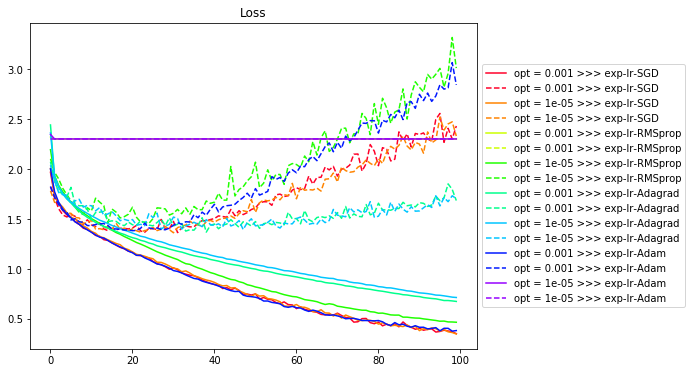

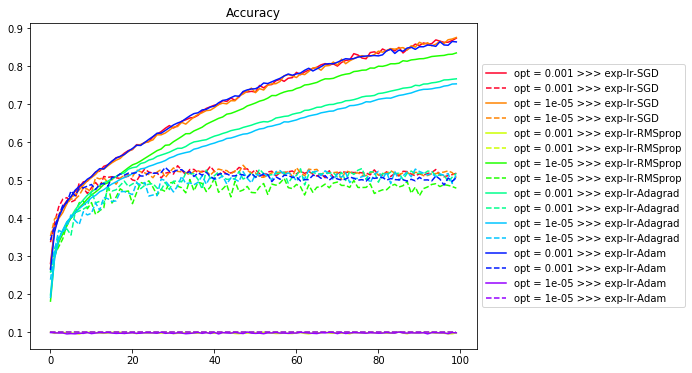

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()